# run 6341 - Study hot spots


In [74]:
import time
print("Last updated on ", time.asctime())

Last updated on  Tue Dec  4 16:56:13 2018


In [75]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import os
import time
import datetime

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.dates  as md
import collections       as collections
import pandas            as pd

from   scipy import optimize
import invisible_cities.core.fit_functions as fitf
from  invisible_cities.core .core_functions import in_range

import krcal.utils.plt_functions          as krplot
import krcal.utils.hst_extend_functions   as hst

import csth.utils.pmaps         as pmapdf
import csth.utils.cepeak        as cpk
import csth.utils.cepeak_pmaps  as cpkpmap
import csth.utils.cepeak_plot   as cpkplot

In [77]:
# Plotting style
default_cmap = "jet"
figure_size  = 14, 8
font_size    = 14

plt.rcParams["figure.figsize"] =   figure_size
plt.rcParams[  "font.size"   ] =   font_size

## Events

## load files

In [78]:
locations  = ["{:04}".format(i) for i in range(0, 2000)]

In [79]:
run_number = 6341
tag = "trigger2_v0.9.9_20180921_krbg1300"
input_filenames  = [f"$IC_DATA/{run_number}/pmaps/trigger2/pmaps_{location}_{run_number}_{tag}.h5" for location in locations]
input_files     = [os.path.expandvars(ifile) for ifile in input_filenames]

correction_filename    = f"$IC_DATA/maps/kr_corrections_run{run_number}.h5"
correction_file        = os.path.expandvars(correction_filename)

In [80]:
def ehotab(size = 1):
    ehot = cpk.ATable(['event', 'peak'], 
                      ['sipma', 'q0a', 'xa', 'ya', 'q0b', 'xb', 'yb', 'zb', 
                       'qc', 'ec', 'xc', 'yc', 'zc', 'qd','ed', 'xd', 'yd', 'zd', 
                      'ee', 'xe', 'ye', 'ze'], 
                      size = size, nints = 3)
    return ehot


def ehot(input_filename, q0min = 6.):
    
    pmaps, runinfo        = cpkpmap.data(input_filename)
    
    calibrate, xpos, ypos = cpkpmap.tools(correction_file, run_number)
    
    spmaps = pmapdf.filter_1s1(pmaps)
    
    ehots = ehotab(10000)
    
    for loc, pmap in pmapdf.epeak_iterator(spmaps):
        
        s1, s2, s2i = pmap.s1, pmap.s2, pmap.s2i
        
        q0ij = s2i.ene.values
        sipm = s2i.nsipm.values
    
        idx   = np.argmax(q0ij)
        q0    = q0ij[idx]
        isipm = sipm[idx]
        x     = xpos[isipm]
        y     = ypos[isipm]
        
        iehot = ehotab()
        iehot.sipma = isipm
        iehot.q0a   = q0
        iehot.xa    = x
        iehot.ya    = y
        
        epk = cpkpmap.epeak(pmap, xpos, ypos, q0min)
        idx         = np.argmax(epk.q0ij)
        iehot.q0b   = epk.q0ij[idx]
        iehot.xb    = epk.xij [idx]
        iehot.yb    = epk.yij [idx]
        iehot.zb    = epk.zij [idx]
    
        cepk = cpk.cepeak(epk, calibrate)
        idx         = np.argmax(cepk.qij)
        iehot.qc    = cepk.qij [idx]
        iehot.ec    = cepk.eij [idx]
        iehot.xc    = cepk.xij [idx]
        iehot.yc    = cepk.yij [idx]
        iehot.zc    = cepk.zij [idx]
        
        idx         = np.argmax(cepk.eij)
        iehot.qd    = cepk.qij [idx]
        iehot.ed    = cepk.eij [idx]
        iehot.xd    = cepk.xij [idx]
        iehot.yd    = cepk.yij [idx]
        iehot.zd    = cepk.zij [idx]

        ehot1, ehot2, _ , _, _ = cpk.naiveblobs(cepk.eij, cepk.xij, cepk.yij, cepk.zij)
        
        #iehot.q    = cepk.qij [idx]
        iehot.ee    = ehot1[0] 
        iehot.xe    = ehot1[1]
        iehot.ye    = ehot1[2]
        iehot.ze    = ehot1[3]
        
        #print(iehot.df())
        ehots.set(iehot, loc)
    
    df = ehots.df()
    df = cpk._clean_df(df)
        
    return df
        

In [83]:
ehotdfs = [ehot(ifile, 0.) for ifile in input_files]

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0000_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0001_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0002_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0003_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0004_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0005_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0006_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

/Users/hernando/investigacion/NEXT/work/ICAROS/csth/utils/cepeak.py:427: RuntimeWarning: invalid value encountered in true_divide
  eij[kslice] = qij[kslice] * e0i[k]/qi[k]


processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0015_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0016_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0017_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0018_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0019_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0020_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0021_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0078_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0079_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0080_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0081_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0082_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0083_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0084_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0141_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0142_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0143_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0144_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0145_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0146_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0147_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0204_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0205_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0206_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0207_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0208_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0209_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0210_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0267_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0268_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0269_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0270_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0271_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0272_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0273_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0330_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0331_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0332_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0333_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0334_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0335_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0336_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0393_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0394_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0395_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0396_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0397_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0398_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0399_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0456_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0457_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0458_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0459_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0460_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0461_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0462_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0519_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0520_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0521_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0522_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0523_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0524_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0525_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0582_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0583_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0584_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0585_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0586_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0587_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0588_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0645_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0646_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0647_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0648_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0649_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0650_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0651_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0708_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0709_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0710_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0711_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0712_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0713_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0714_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0771_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0772_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0773_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0774_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0775_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0776_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0777_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0834_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0835_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0836_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0837_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0838_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0839_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0840_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0897_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0898_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0899_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0900_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0901_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0902_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0903_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0960_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0961_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0962_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0963_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0964_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0965_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_0966_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1023_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1024_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1025_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1026_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1027_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1028_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1029_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1086_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1087_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1088_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1089_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1090_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1091_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1092_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1149_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1150_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1151_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1152_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1153_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1154_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1155_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1212_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1213_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1214_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1215_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1216_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1217_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1218_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1275_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1276_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1277_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1278_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1279_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1280_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1281_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1338_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1339_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1340_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1341_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1342_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1343_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1344_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1401_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1402_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1403_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1404_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1405_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1406_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1407_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1464_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1465_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1466_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1467_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1468_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1469_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1470_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1527_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1528_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1529_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1530_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1531_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1532_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1533_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1590_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1591_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1592_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1593_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1594_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1595_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1596_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1653_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1654_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1655_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1656_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1657_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1658_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1659_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1716_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1717_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1718_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1719_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1720_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1721_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1722_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1779_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1780_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1781_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1782_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1783_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1784_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1785_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1842_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1843_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1844_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1845_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1846_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1847_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1848_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1905_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1906_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1907_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1908_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1909_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1910_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1911_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1968_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1969_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1970_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1971_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1972_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1973_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_1974_6341_trigger2_v0.9.9_20180921_krbg1300.h5
processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigge

In [84]:
ehotdf = ehotdfs[0]
for iehotdf in ehotdfs[1:]:
    ehotdf = ehotdf.append(iehotdf, ignore_index = True)

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


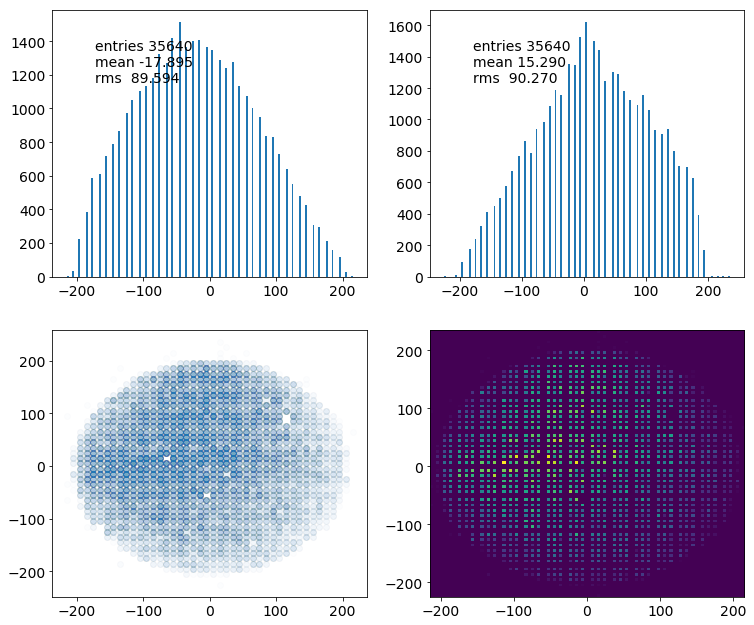

In [85]:
c = hst.Canvas(2, 2)
hst.hist(ehotdf.xa, 150, canvas = c(1));
hst.hist(ehotdf.ya, 150, canvas = c(2));
hst.scatter(ehotdf.xa, ehotdf.ya, alpha = 0.01, canvas = c(3))
hst.hist2d(ehotdf.xa, ehotdf.ya, (100, 100), canvas = c(4));

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


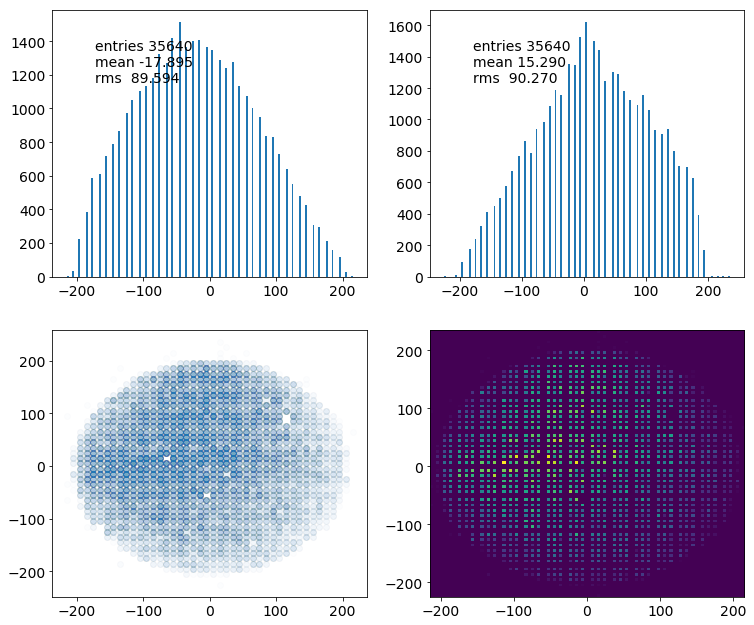

In [86]:
c = hst.Canvas(2, 2)
hst.hist(ehotdf.xb, 150, canvas = c(1));
hst.hist(ehotdf.yb, 150, canvas = c(2));
hst.scatter(ehotdf.xb, ehotdf.yb, alpha = 0.01, canvas = c(3))
hst.hist2d (ehotdf.xb, ehotdf.yb, (100, 100), canvas = c(4));

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


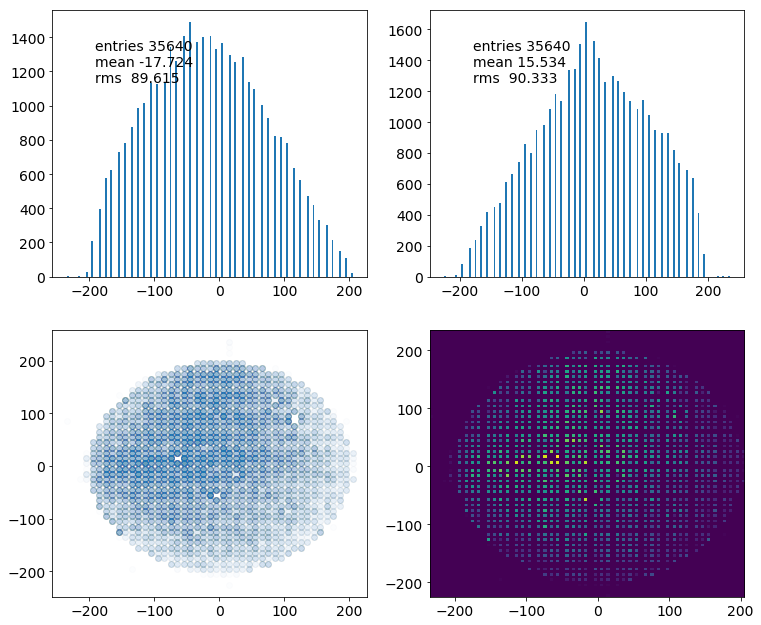

In [87]:
c = hst.Canvas(2, 2)
hst.hist(ehotdf.xc, 150, canvas = c(1));
hst.hist(ehotdf.yc, 150, canvas = c(2));
hst.scatter(ehotdf.xc, ehotdf.yc, alpha = 0.01, canvas = c(3))
hst.hist2d (ehotdf.xc, ehotdf.yc, (100, 100), canvas = c(4));

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


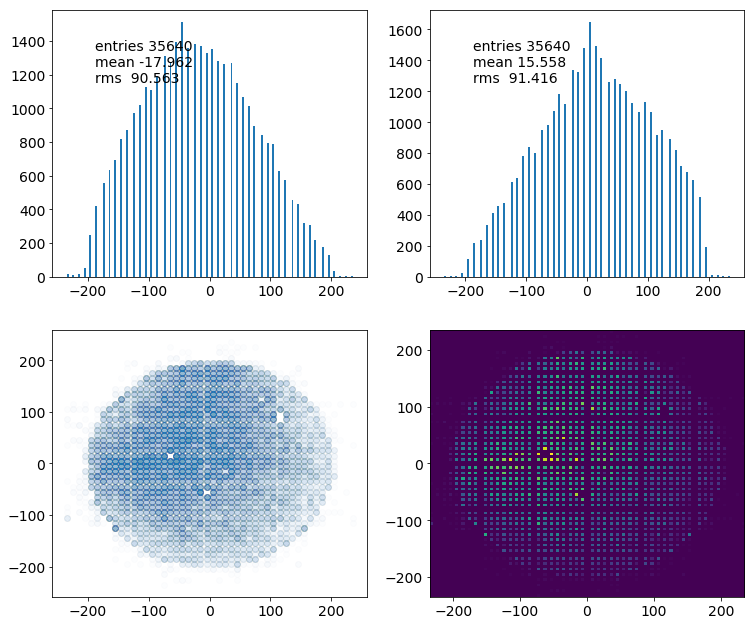

In [88]:
c = hst.Canvas(2, 2)
hst.hist(ehotdf.xd, 150, canvas = c(1));
hst.hist(ehotdf.yd, 150, canvas = c(2));
hst.scatter(ehotdf.xd, ehotdf.yd, alpha = 0.01, canvas = c(3))
hst.hist2d (ehotdf.xd, ehotdf.yd, (100, 100), canvas = c(4));

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


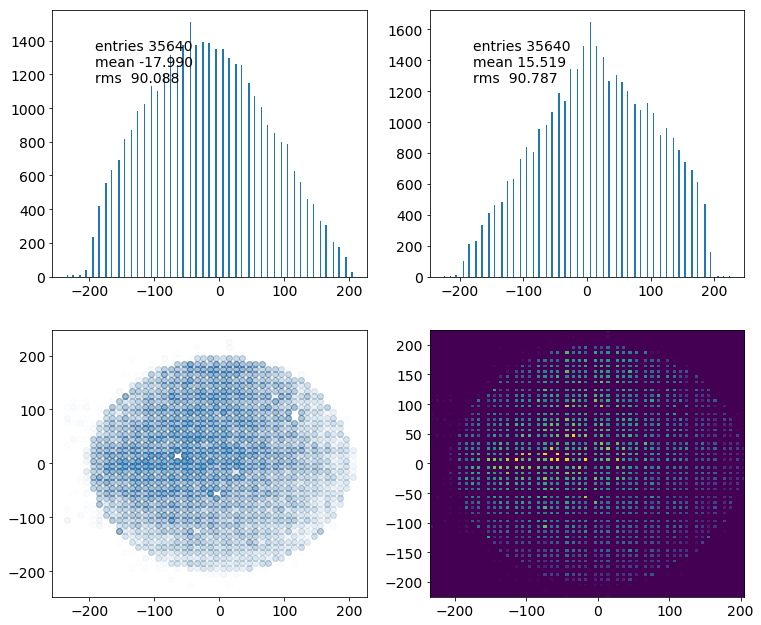

In [89]:
c = hst.Canvas(2, 2)
hst.hist(ehotdf.xe, 200, canvas = c(1));
hst.hist(ehotdf.ye, 200, canvas = c(2));
hst.scatter(ehotdf.xe, ehotdf.ye, alpha = 0.01, canvas = c(3))
hst.hist2d (ehotdf.xe, ehotdf.ye, (100, 100), canvas = c(4));

In [93]:
run_numbers = [6341,]
tag = '6q0min'
input_filenames = [f"$IC_DATA/{run_number}/cepks/cepks_{run_number}_0000_11999_{tag}.h5" for run_number in run_numbers]
input_files     = [os.path.expandvars(ifile) for ifile in input_filenames]

In [94]:
def esum_from_hdf(filename, clear = True):
    print(filename)
    h = pd.HDFStore(filename)
    esum = h['esum']
    print('total events :', len(esum))
    esum.dropna()
    sel_base = (esum.nslices > 0) & (esum.nhits > 0) & (esum.s1e > 0) & (esum.q0 > 0) & (esum.e0 > 0)
    esum = esum[sel_base]
    print('clean events :', len(esum) )
    #esum0 = esum[sel_base]
    #h.close()
    return esum

In [95]:
esums = [esum_from_hdf(ifile) for ifile in input_files]

/Users/hernando/investigacion/NEXT/data/runIV//6341/cepks/cepks_6341_0000_11999_6q0min.h5
total events : 203104
clean events : 203104


In [96]:
esum = esums[0]

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


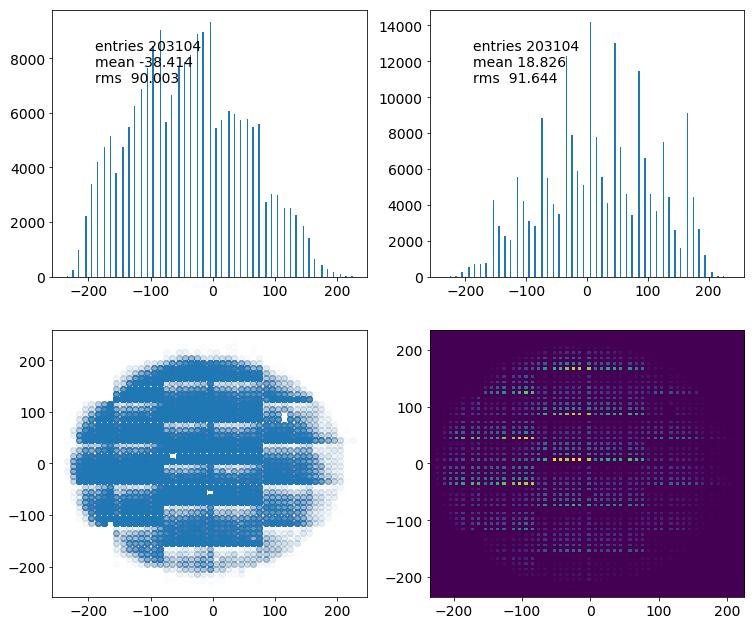

In [97]:
c = hst.Canvas(2, 2)
hst.hist(esum.x1, 200, canvas = c(1));
hst.hist(esum.y1, 200, canvas = c(2));
hst.scatter(esum.x1, esum.y1, alpha = 0.01, canvas = c(3))
hst.hist2d (esum.x1, esum.y1, (100, 100), canvas = c(4));

In [98]:
hot_evts = ehotdf.event.values
esm_evts = esum  .event.values

In [99]:
#ehotdf.to_hdf('ehot_6241_0000_2000.h5', key = 'ehot')

In [100]:
iok = np.isin(esm_evts, hot_evts)

In [101]:
print(iok)

[ True  True  True ... False False False]


In [102]:
ehot = ehotdf
esgroups = esum.groupby(['event', 'peak'])
ehgroups = ehot.groupby(['event', 'peak'])

dx, dy, dz, de = [], [], [], []
for iloc, ehgroup in ehgroups:
    try:
        esgroup = esgroups.get_group(iloc)
    except:
        dx.append(-999)
        dy.append(-999)
        dz.append(-999)
        de.append(-999)
        continue
    idx = ehgroup.xe.values - esgroup.x1.values
    idy = ehgroup.ye.values - esgroup.y1.values
    idz = ehgroup.ze.values - esgroup.z1.values
    ide = ehgroup.ee.values - esgroup.e1.values
    dx.append(idx[0])
    dy.append(idy[0])
    dz.append(idz[0])
    de.append(ide[0])

In [103]:
dx = np.array(dx)
dy = np.array(dy)
dz = np.array(dz)
de = np.array(de)


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


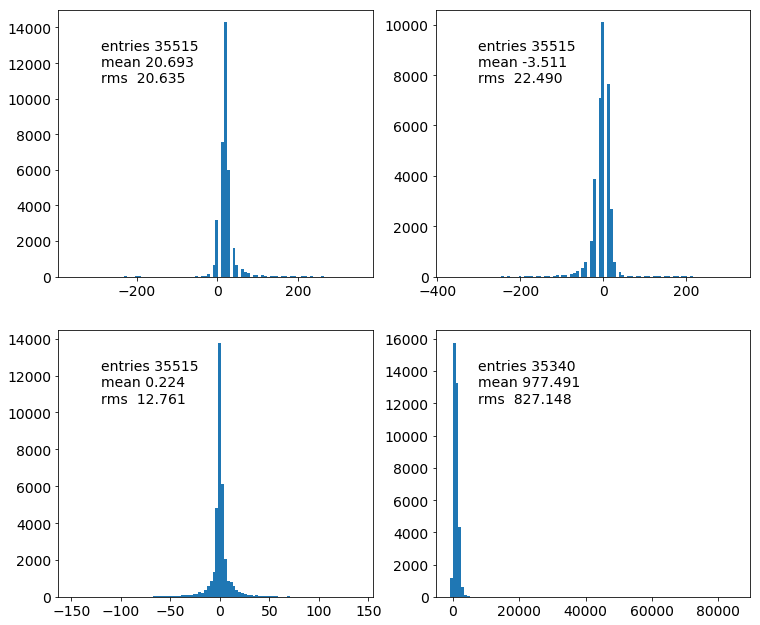

In [104]:
c = hst.Canvas(2, 2)
hst.hist(dx[dx > -900], 100, canvas = c(1))
hst.hist(dy[dy > -900], 100, canvas = c(2))
hst.hist(dz[dz > -900], 100, canvas = c(3))
hst.hist(de[de > -900], 100, canvas = c(4));